## Geo Plotting the Sports Bars and Stadiums/Arenas on the Philly Map

### Make the Philly Map

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely import wkt

import contextily as cx

In [2]:
# importing the mapp of philadelphia
philly_map = gpd.read_file("../data_analysis/data/philadelphia_zipcode.geojson")
philly_map.head()

,OBJECTID,CODE,COD,Shape__Area,Shape__Length,geometry
0,1,19120,20,9.177970e+07,49921.544063,"POLYGON ((-75.11107 40.04682, -75.10943 40.045..."
1,2,19121,21,6.959879e+07,39534.887217,"POLYGON ((-75.19227 39.99463, -75.19205 39.994..."
2,3,19122,22,3.591632e+07,24124.645221,"POLYGON ((-75.15406 39.98601, -75.15328 39.985..."
3,4,19123,23,3.585175e+07,26421.728982,"POLYGON ((-75.15190 39.97056, -75.15150 39.970..."
4,5,19124,24,1.448080e+08,63658.770420,"POLYGON ((-75.09660 40.04249, -75.09281 40.039..."


<Axes: >

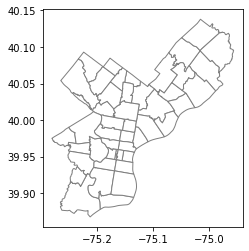

In [3]:
philly_map.plot(edgecolor='gray', color='white')

### Add the Sports Bars

In [4]:
sports_bars_loc_df = pd.read_csv('data/sports_bars_loc.csv')
sports_bars_loc_df

,Name,Longitude,Latitude,Address,Zipcode
0,XFINITY Live,39.904584,-75.168887,1100 Pattison Avenue,19148
1,City Tap House,39.954433,-75.201203,3925 Walnut Street,19104
2,McGillin’s Olde Ale House,39.950306,-75.162643,1310 Drury Street,19107
3,Chickie's and Pete's,39.911549,-75.174489,1526 Packer Ave,19145
4,Iron Hill Brewery and Restaurant,39.951859,-75.159517,1150 Market Street,19107
5,Bar-Ly Chinatown,39.954526,-75.157836,101 N 11th St,19107
6,Live! Casino and Hotel,39.909356,-75.164705,900 Packer Ave,19148
7,Garage: Passyunk,39.933631,-75.158842,1231 Passyunk Ave,19147
8,Garage: Fishtown,39.968829,-75.134186,100 E. Girard Ave,19125
9,The Post,39.952931,-75.183699,129 S. 30th St,19104


In [5]:
gpd.points_from_xy(sports_bars_loc_df['Latitude'], sports_bars_loc_df['Longitude'])

<GeometryArray>
Length: 10, dtype: geometry

In [6]:
sports_bars_loc_gdf = gpd.GeoDataFrame(sports_bars_loc_df,geometry=gpd.points_from_xy(sports_bars_loc_df['Latitude'], sports_bars_loc_df['Longitude']))

<Axes: >

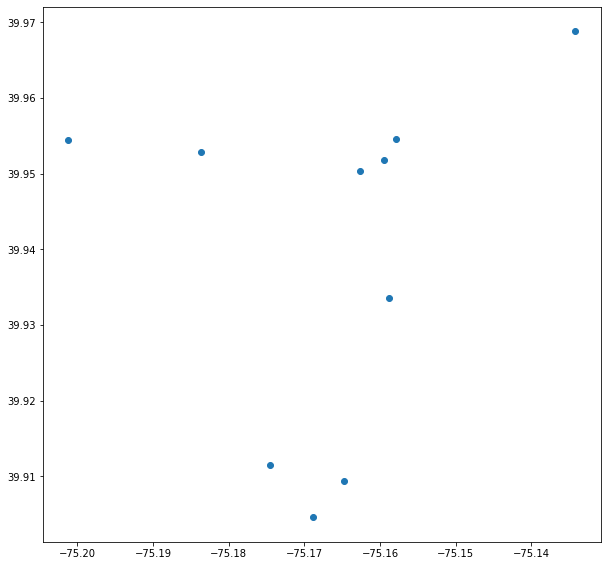

In [7]:
sports_bars_loc_gdf.plot(figsize=(10,10))


<Axes: >

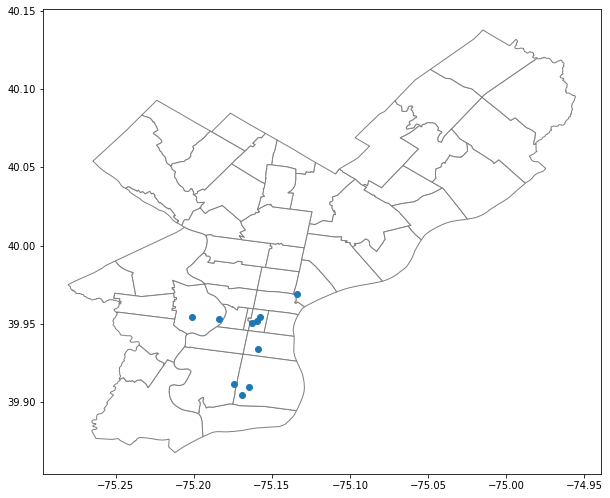

In [8]:
base = philly_map.plot(edgecolor='gray', color='white', figsize=(10,10))
sports_bars_loc_gdf.plot(ax = base)

### Add the Stadium/Arenas

In [9]:
stadiums_loc_df = pd.read_csv('data/stadiums_loc.csv')
stadiums_loc_df

,Name,Longitude,Latitude,Address,Zipcode
0,Lincoln Financial Field,39.901551,-75.167543,One Lincoln Financial Field Way,19148
1,Citizens Bank Park,39.906073,-75.166640,1 Citizens Bank Way,19148
2,Wells Fargo Center,39.901344,-75.172004,3601 S. Broad Street,19148


In [10]:
gpd.points_from_xy(stadiums_loc_df['Latitude'], stadiums_loc_df['Longitude'])

<GeometryArray>
Length: 3, dtype: geometry

In [11]:
stadiums_loc_gdf = gpd.GeoDataFrame(stadiums_loc_df,geometry=gpd.points_from_xy(stadiums_loc_df['Latitude'], stadiums_loc_df['Longitude']))

<Axes: >

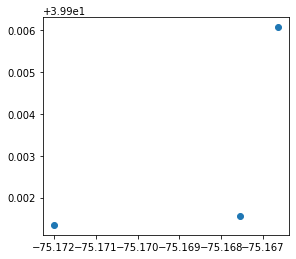

In [12]:
stadiums_loc_gdf.plot()

<Axes: >

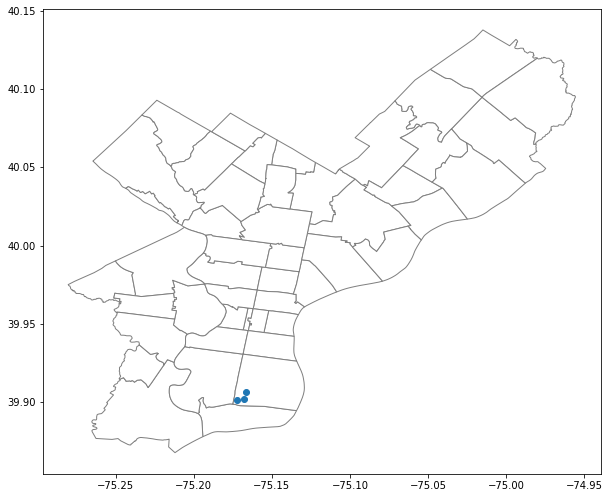

In [13]:
base = philly_map.plot(edgecolor='gray', color='white', figsize=(10,10))
stadiums_loc_gdf.plot(ax = base)

### Combine the Sports Bars and the Stadium/Arenas on the Same Philly Map

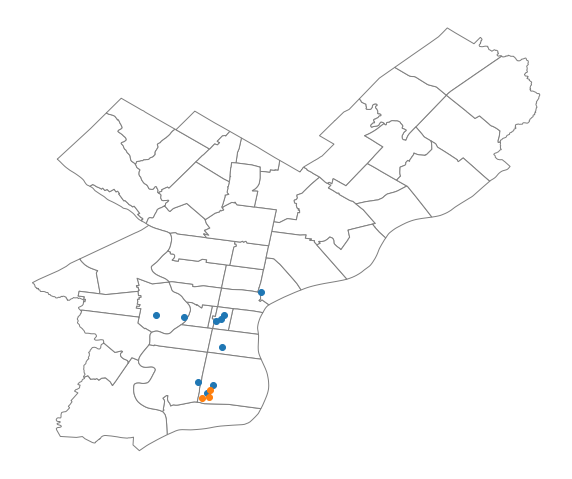

In [14]:
base = philly_map.plot(edgecolor='gray', color='white', figsize=(10,10))
sports_bars_loc_gdf.plot(ax = base)
stadiums_loc_gdf.plot(ax = base)
base.set_axis_off()
plt.show()

The orange represents the stadiums/sports bars and the blue represents the sports bars.